# NetVLAD

## Imports

In [1]:
import pandas as pd

from utils.model_utils import *

## Data

In [2]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
print(data_df.shape)
data_df.head(5)

(4498, 10)


,location_name_1,N_1,E_1,X_1,Y_1,location_name_2,N_2,E_2,X_2,Y_2
0,grab_1216908647.318,4994.928,-3023.441,-2892.030,5058.007,grab_1216904541.487,4993.276,-3019.528,-2888.173,5056.267
1,grab_1216908662.125,4991.210,-3017.480,-2886.182,5054.156,grab_1216908018.296,4988.612,-3018.339,-2887.100,5051.583
2,grab_1216908678.463,4987.743,-3012.651,-2881.456,5050.583,grab_1216908016.595,4986.539,-3014.175,-2883.003,5049.416
3,grab_1216908679.824,4985.295,-3008.686,-2877.566,5048.046,grab_1216904557.318,4984.349,-3008.709,-2877.612,5047.102
4,grab_1216908680.845,4983.482,-3004.505,-2873.445,5046.139,grab_1216904558.844,4982.276,-3004.523,-2873.492,5044.936


In [3]:
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(100)

In [4]:
# load the best model with PCA (trained by SFRS)
model = load_model("OpenIBL")

Using cache found in /home/mati/.cache/torch/hub/yxgeee_OpenIBL_master
/home/mati/machine_perception/project/scene_matching_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mati/machine_perception/project/scene_matching_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## Experiments

In [5]:
embeddings_df = extract_location_embeddings_OpenIBL(data_df, model)
save_embeddings_to_npy(embeddings_df, output_folder='data/saved_embeddings')
embeddings_df.head()

Processing Locations: 100%|██████████| 197/197 [01:10<00:00,  2.78it/s]


,location_name,view,embedding
0,grab_1216910019.075,0,"[0.019444413, 0.0069213863, 0.023842556, -0.00..."
1,grab_1216910019.075,1,"[0.015183984, 0.0067192283, 0.021987548, -0.01..."
2,grab_1216910019.075,2,"[0.016457997, 0.012967783, 0.0348552, -0.02034..."
3,grab_1216910019.075,3,"[-0.0010499449, 0.01855359, 0.016633477, -0.02..."
4,grab_1216910019.075,4,"[0.007475401, 0.010311699, 0.010270508, -0.011..."


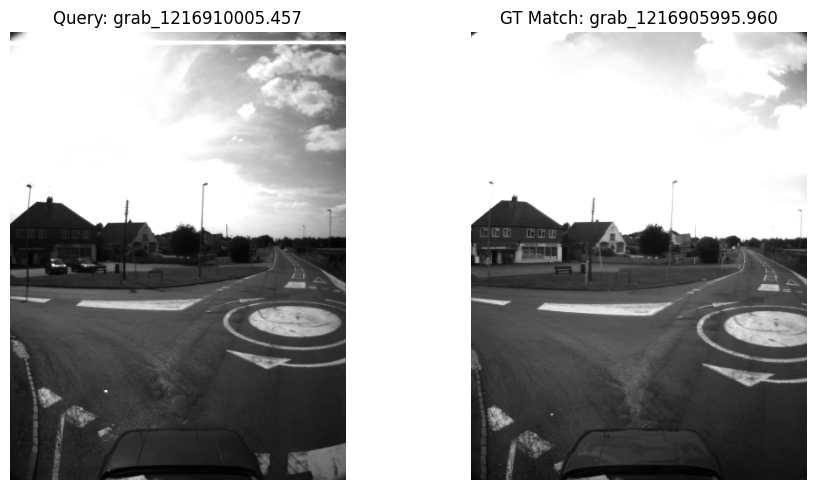

In [6]:
display_gt_pair(data_df, 1, 0)

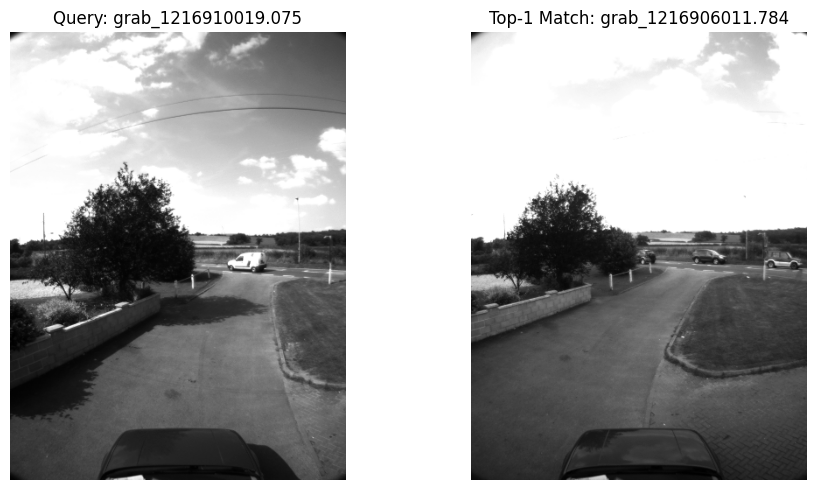

In [7]:
loc1 = data_df.iloc[0]["location_name_1"]
closest = search_closest(loc1, 0, embeddings_df, base_df=data_df, show=True)

## Results

### Single-View

In [8]:
results = evaluate_accuracy_per_view(data_df, embeddings_df)

Calculating results for view 0


100it [00:00, 542.84it/s]


Calculating results for view 1


100it [00:00, 616.06it/s]


Calculating results for view 2


100it [00:00, 566.46it/s]


Calculating results for view 3


100it [00:00, 561.26it/s]


Calculating results for view 4


100it [00:00, 628.02it/s]


In [9]:
results

{0: {'top1_accuracy': 0.76,
  'top5_accuracy': 0.87,
  'top10_accuracy': 0.89,
  'count': 100},
 1: {'top1_accuracy': 0.71,
  'top5_accuracy': 0.86,
  'top10_accuracy': 0.88,
  'count': 100},
 2: {'top1_accuracy': 0.78,
  'top5_accuracy': 0.86,
  'top10_accuracy': 0.91,
  'count': 100},
 3: {'top1_accuracy': 0.69,
  'top5_accuracy': 0.84,
  'top10_accuracy': 0.9,
  'count': 100},
 4: {'top1_accuracy': 0.72,
  'top5_accuracy': 0.82,
  'top10_accuracy': 0.85,
  'count': 100}}

### Majority Vote

In [10]:
mv_results = evaluate_accuracy_majority_vote(data_df, embeddings_df)

Calculating results


0it [00:00, ?it/s]

100it [00:00, 127.81it/s]


In [11]:
mv_results

{'top1_accuracy': 0.85,
 'top5_accuracy': 0.93,
 'top10_accuracy': 0.93,
 'count': 100}

In [12]:
embeddings_df_loaded = load_embeddings_from_npy_folder('data/saved_embeddings')

Loading embeddings...


100%|██████████| 4585/4585 [00:00<00:00, 9650.77it/s]


In [13]:
embeddings_df_loaded.head()

,location_name,view,embedding
0,grab_1216911569.671,0,"[0.014759308, -0.0012509044, 0.010264469, 0.00..."
1,grab_1216910680.873,3,"[0.022096515, -0.00018631668, 0.0063386997, 0...."
2,grab_1216906698.604,2,"[0.011158708, 0.008703584, 0.007519887, -0.013..."
3,grab_1216906295.490,4,"[0.01885014, 0.009713138, 0.012588667, 0.00560..."
4,grab_1216905742.912,1,"[0.019870343, -0.0009816358, 0.012092763, -0.0..."


### Concatenated Embeddings

In [14]:
location_embeddings = extract_concatenate_embeddings_OpenIBL(data_df, model, image_folder='Eynsham/Images')
top_1_concat, top_5_concat, top_10_concat = concat_evaluate_matching_accuracy(data_df, location_embeddings)
print(f"Accuracy for concatenated embeddings NetVLAD: Top 1: {top_1_concat*100:.4f}%, Top 5: {top_5_concat*100:.4f}%, Top 10: {top_10_concat*100:.4f}%")

Processing Locations: 100%|██████████| 197/197 [00:48<00:00,  4.05it/s]


Accuracy for concatenated embeddings NetVLAD: Top 1: 91.0000%, Top 5: 93.0000%, Top 10: 94.0000%
